In [1]:
import pandas as pd

# Reading the CSV file, renaming the column as 'value'
df = pd.read_csv('wwwusage.csv', names=['value'], header=0)

# Printing the total number of samples
print(f"Total samples: {len(df)}")

# Displaying the first few rows of the DataFrame
print(df.head())


Total samples: 100
     value
1 1     88
2 2     84
3 3     85
4 4     85
5 5     84


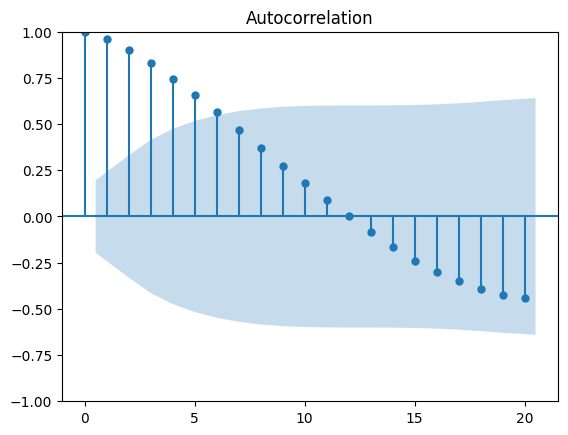

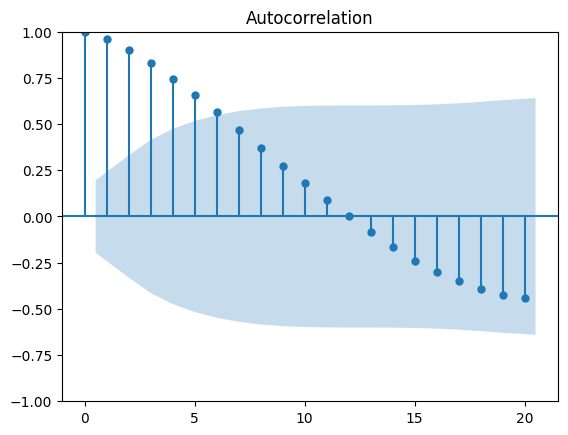

In [2]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot the autocorrelation function for the 'value' column of the dataframe
plot_acf(df.value)


2  2   -4.0
3  3    1.0
4  4    0.0
5  5   -1.0
6  6    1.0
Name: value, dtype: float64
Length before dropna: 100, after dropna: 99


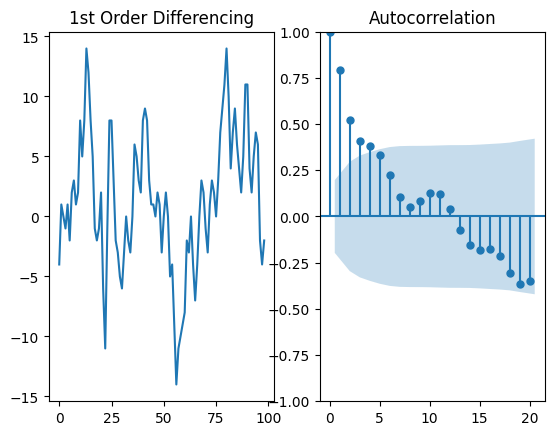

In [7]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Check if the 'value' column is numeric and inspect the diffed series
diff_series = df['value'].diff().dropna()

# Inspect before plotting
print(diff_series.head())
print(f"Length before dropna: {len(df['value'].diff())}, after dropna: {len(diff_series)}")

# If the diffed series is fine, proceed with plotting
f = plt.figure()

ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')

# Plot the differenced series, using .values for numpy array
ax1.plot(diff_series.values)

# Second subplot: Plot the ACF of the differenced series
ax2 = f.add_subplot(122)
plot_acf(diff_series, ax=ax2)

plt.show()


3  3    5.0
4  4   -1.0
5  5   -1.0
6  6    2.0
7  7   -3.0
Name: value, dtype: float64
Length before dropna: 100, after dropna: 98


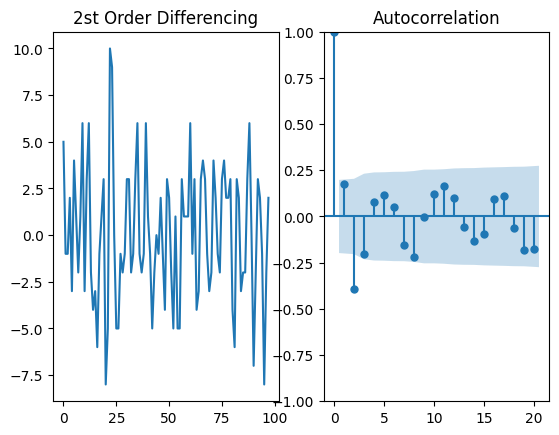

In [9]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Check if the 'value' column is numeric and inspect the diffed series
diff_series = df['value'].diff().diff().dropna()

# Inspect before plotting
print(diff_series.head())
print(f"Length before dropna: {len(df['value'].diff().diff())}, after dropna: {len(diff_series)}")

# If the diffed series is fine, proceed with plotting
f = plt.figure()

ax1 = f.add_subplot(121)
ax1.set_title('2st Order Differencing')

# Plot the differenced series, using .values for numpy array
ax1.plot(diff_series.values)

# Second subplot: Plot the ACF of the differenced series
ax2 = f.add_subplot(122)
plot_acf(diff_series, ax=ax2)

plt.show()


##### However, a more mathematical test can be employed to determine which order is best for the data in question. The Augmented Dickey-Fuller test is one such measure that statsmodel readily provides. The ADF test aims to reject the null hypothesis that the given time-series data is non-stationary. It calculates the p-value and compares it with a threshold value or significance level of 0.05. If the p-value is less than this level, then the data is stationary; else, the differencing order is incremented by one.

In [10]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df.value.dropna())
print('p-value: ', result[1])

result = adfuller(df.value.diff().dropna())
print('p-value: ', result[1])

result = adfuller(df.value.diff().diff().dropna())
print('p-value: ', result[1])


p-value:  0.12441935447109487
p-value:  0.07026846015272728
p-value:  2.843428755547158e-17


In [12]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (order = (1, 1, 2))
arima_model = ARIMA(df.value, order=(1, 1, 2))
model = arima_model.fit()

# Print the summary
print(model.summary())


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  100
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -254.126
Date:                Sun, 15 Dec 2024   AIC                            516.253
Time:                        11:05:51   BIC                            526.633
Sample:                             0   HQIC                           520.453
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6976      0.130      5.365      0.000       0.443       0.952
ma.L1          0.4551      0.169      2.699      0.007       0.125       0.786
ma.L2         -0.0664      0.157     -0.424      0.6

/home/andv/VCS/visualization/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/andv/VCS/visualization/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/andv/VCS/visualization/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


/home/andv/VCS/visualization/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/andv/VCS/visualization/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


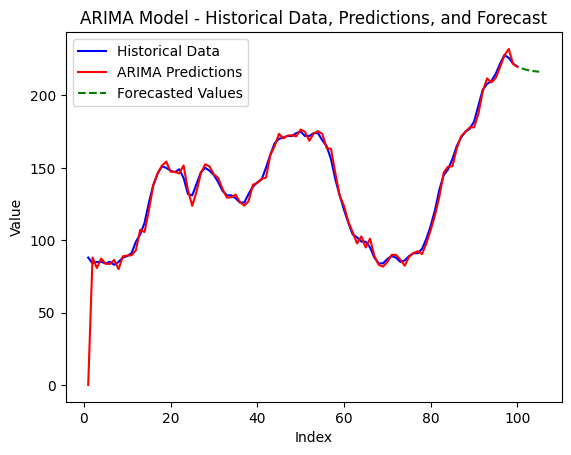

In [29]:
import matplotlib.pyplot as plt

# Number of steps to forecast (e.g., 5 steps ahead)
forecast_steps = 5

# Forecast the next values (beyond the historical data)
forecast_values = model.forecast(steps=forecast_steps)

# Generate a future index for the forecast
future_index = range(df.index[-1][0] + 1, df.index[-1][0] + 1 + forecast_steps)

# Plot the historical data
plt.plot(df.index.get_level_values(0), df['value'], label='Historical Data', color='blue')

# Get the predicted values from the ARIMA model
predicted_values = model.fittedvalues

# Plot the ARIMA model predictions
plt.plot(df.index.get_level_values(0), predicted_values, label='ARIMA Predictions', color='red')

# Plot the forecasted future values
plt.plot(future_index, forecast_values, label='Forecasted Values', color='green', linestyle='--')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('ARIMA Model - Historical Data, Predictions, and Forecast')

# Show legend
plt.legend()

# Display the plot
plt.show()
